## (1) MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.ndimage import shift
import matplotlib.pyplot as plt

In [7]:
print("MNIST 데이터셋 로드 중...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.int64)

# 데이터 분할 (60000개 훈련, 10000개 테스트)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

MNIST 데이터셋 로드 중...
훈련 데이터 크기: (60000, 784), 테스트 데이터 크기: (10000, 784)


In [9]:
print("\n기본 KNN 모델 테스트 중...")

# 기본 매개변수(n_neighbors=5, weights='uniform')로 KNN 모델 생성
base_knn = KNeighborsClassifier()
base_knn.fit(X_train, y_train)
baseline_acc = base_knn.score(X_test, y_test)
print(f"기본 KNN 모델 정확도: {baseline_acc:.4f}")


기본 KNN 모델 테스트 중...
기본 KNN 모델 정확도: 0.9688


In [10]:
print("\n최적 하이퍼파라미터 탐색 중...")
# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': range(3, 6),  # 힌트에서 권장한 하이퍼파라미터
    'weights': ['uniform', 'distance']  # 힌트에서 권장한 하이퍼파라미터
}

# 전체 데이터는 매우 큰 계산 비용이 필요하므로, 표본 추출하여 그리드 서치 수행
grid_search = GridSearchCV(
    KNeighborsClassifier(), param_grid, cv=3,
    scoring='accuracy', n_jobs=-1
)
# 10,000개 데이터 표본으로 그리드 서치 실행
grid_search.fit(X_train[:10000], y_train[:10000])

# 결과 출력
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 정확도: {grid_search.best_score_:.4f}")


최적 하이퍼파라미터 탐색 중...
최적 하이퍼파라미터: {'n_neighbors': 4, 'weights': 'distance'}
최고 교차 검증 정확도: 0.9398


In [11]:
print("\n최적 하이퍼파라미터로 전체 훈련 데이터셋에서 모델 훈련 중...")
# 최적 하이퍼파라미터로 새 모델 생성
best_knn = KNeighborsClassifier(**grid_search.best_params_)
# 전체 훈련 데이터로 학습
best_knn.fit(X_train, y_train)
# 테스트 세트에서 평가
best_acc = best_knn.score(X_test, y_test)
print(f"최적 KNN 모델 정확도: {best_acc:.4f}")


최적 하이퍼파라미터로 전체 훈련 데이터셋에서 모델 훈련 중...
최적 KNN 모델 정확도: 0.9714


## (2) MNIST 이미지를 (왼, 오른, 위, 아래 ) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어보세요.

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift  # 이미지 이동을 위한 함수

In [13]:
def shift_image(image, direction):
    """
    MNIST 이미지를 지정된 방향으로 한 픽셀 이동시키는 함수

    매개변수:
        image: 원본 이미지 (1D 배열, 길이 784)
        direction: 이동 방향 ('left', 'right', 'up', 'down')

    반환값:
        이동된 이미지 (1D 배열, 길이 784)
    """
    # 1D 이미지를 28x28 2D 이미지로 변환
    image_2d = image.reshape(28, 28)

    # 방향에 따라 이동 벡터 설정
    if direction == 'left':
        shift_vector = [0, -1]
    elif direction == 'right':
        shift_vector = [0, 1]
    elif direction == 'up':
        shift_vector = [-1, 0]
    elif direction == 'down':
        shift_vector = [1, 0]
    else:
        raise ValueError("방향은 'left', 'right', 'up', 'down' 중 하나여야 합니다.")

    # 이미지 이동(빈 공간은 0으로 채움)
    shifted_image = shift(image_2d, shift_vector, mode='constant', cval=0)

    # 2D 이미지를 다시 1D로 변환하여 반환
    return shifted_image.reshape(-1)

<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-e6e4c7b41b78>:24: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Dej

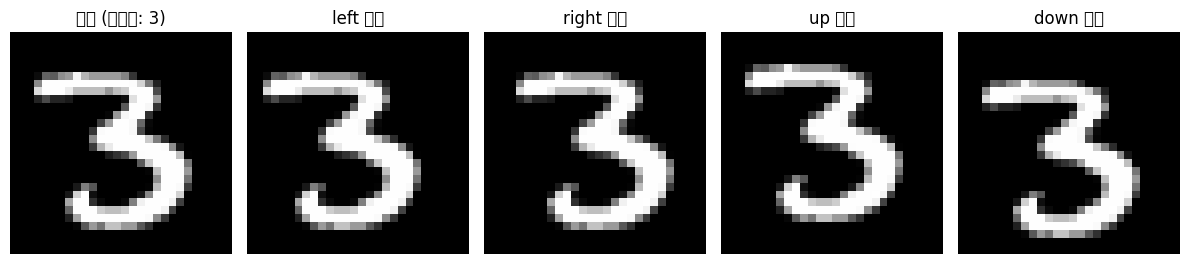

In [14]:
# 샘플 이미지 선택
sample_idx = 12  # 임의의 인덱스
sample_image = X_train[sample_idx]
sample_label = y_train[sample_idx]

# 원본과 이동된 이미지 시각화
plt.figure(figsize=(12, 3))

# 원본 이미지
plt.subplot(1, 5, 1)
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"원본 (레이블: {sample_label})")
plt.axis('off')

# 네 방향으로 이동된 이미지
directions = ['left', 'right', 'up', 'down']
for i, direction in enumerate(directions):
    shifted = shift_image(sample_image, direction)
    plt.subplot(1, 5, i+2)
    plt.imshow(shifted.reshape(28, 28), cmap='gray')
    plt.title(f"{direction} 이동")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
print("\n데이터 증강 중...")
# 원본 데이터를 리스트로 변환
X_augmented = list(X_train)
y_augmented = list(y_train)

# 처리 시간이 오래 걸릴 수 있으므로 진행 상황 표시
directions = ['left', 'right', 'up', 'down']
for i, image in enumerate(X_train):
    if i % 10000 == 0:  # 10,000개마다 진행 상황 출력
        print(f"  처리 중: {i}/{len(X_train)} 이미지")

    # 네 방향으로 이동된 이미지 생성 및 추가
    for direction in directions:
        shifted_image = shift_image(image, direction)
        X_augmented.append(shifted_image)
        y_augmented.append(y_train[i])  # 원본과 동일한 레이블 유지

# 리스트를 NumPy 배열로 변환
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

print("데이터 증강 완료!")
print(f"원본 훈련 데이터 크기: {X_train.shape}")
print(f"증강 후 훈련 데이터 크기: {X_augmented.shape}")
print(f"증강 비율: {X_augmented.shape[0] / X_train.shape[0]:.1f}배")


데이터 증강 중...
  처리 중: 0/60000 이미지
  처리 중: 10000/60000 이미지
  처리 중: 20000/60000 이미지
  처리 중: 30000/60000 이미지
  처리 중: 40000/60000 이미지
  처리 중: 50000/60000 이미지
데이터 증강 완료!
원본 훈련 데이터 크기: (60000, 784)
증강 후 훈련 데이터 크기: (300000, 784)
증강 비율: 5.0배


In [16]:
optimal_params = {'n_neighbors': 4, 'weights': 'distance'}

print("\n원본 데이터로 KNN 모델 훈련 및 평가 중...")
original_knn = KNeighborsClassifier(**optimal_params)
original_knn.fit(X_train, y_train)
original_acc = original_knn.score(X_test, y_test)

print("\n증강 데이터로 KNN 모델 훈련 및 평가 중...")
augmented_knn = KNeighborsClassifier(**optimal_params)
augmented_knn.fit(X_augmented, y_augmented)
augmented_acc = augmented_knn.score(X_test, y_test)

print(f"\n원본 데이터 모델 정확도: {original_acc:.4f}")
print(f"증강 데이터 모델 정확도: {augmented_acc:.4f}")
print(f"정확도 향상: {augmented_acc - original_acc:.4f}")


원본 데이터로 KNN 모델 훈련 및 평가 중...

증강 데이터로 KNN 모델 훈련 및 평가 중...

원본 데이터 모델 정확도: 0.9714
증강 데이터 모델 정확도: 0.9763
정확도 향상: 0.0049
